<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
# Imports
import re
from collections import Counter
import pandas as pd

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Natural Language Processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity

# Plotting Libraries
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# HTML parsing
from bs4 import BeautifulSoup

# Show a progress bar
from tqdm import tqdm
tqdm.pandas()

In [2]:
# Load spaCy medium model
nlp = spacy.load('en_core_web_md')

In [3]:
# Show more data in the columns
pd.set_option('display.max_colwidth', 150)

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [4]:
# Read in the data
job = pd.read_csv('./data/job_listings.csv', index_col=0)  # index_col=0 removes the extra index column
job

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Aprior...",Data scientist
1,"b'<div>Job Description<br/>\n<br/>\n<p>As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services t...",Data Scientist I
2,"b'<div><p>As a Data Scientist you will be working on consulting side of our business. You will be responsible for analyzing large, complex dataset...",Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-u-xs-mb--md""><div class=""jobsearch-JobMetadataHeader-item ""><span class=""icl-u-xs-mr--xs"">$4,969 - $...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple locations</li>\n<li>2+ years of Analytics experience</li>\n<li>Understand business requirements and ...,Data Scientist
...,...,...
421,"b""<b>About Us:</b><br/>\nWant to be part of a fantastic and fun startup that\xe2\x80\x99s revolutionizing the online travel advertising space? Wan...",Senior Data Science Engineer
422,"b'<div class=""jobsearch-JobMetadataHeader icl-u-xs-mb--md""><div class=""jobsearch-JobMetadataHeader-item icl-u-xs-mt--xs"">Internship</div></div><di...",2019 PhD Data Scientist Internship - Forecasting and Anomaly Detection Platform
423,"b'<div class=""jobsearch-JobMetadataHeader icl-u-xs-mb--md""><div class=""jobsearch-JobMetadataHeader-item ""><span class=""icl-u-xs-mr--xs"">$200,000 -...",Data Scientist - Insurance
424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\nJOB DESCRIPTION</p><p></p><br/>\n<div><b>\nABOUT US</b></div><p></p><br/>\n<div>\nAmplion synthesiz...",Senior Data Scientist


In [5]:
# Remove nonAscii characters
# for i in range(len(job)):
#     job['description'][i] = re.sub('[^\\x00-\\x7f]', '', job['description'][i])
# This did not work because it was coded in as a string and not as hex characters

# Remove the b and ' from the beginning of the values in description
job['description'] = job['description'].str.lstrip('b"').str.lstrip("'")
print(job.shape)
job.head()

(426, 2)


,description,title
0,"<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori,...",Data scientist
1,"<div>Job Description<br/>\n<br/>\n<p>As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to ...",Data Scientist I
2,"<div><p>As a Data Scientist you will be working on consulting side of our business. You will be responsible for analyzing large, complex datasets ...",Data Scientist - Entry Level
3,"<div class=""jobsearch-JobMetadataHeader icl-u-xs-mb--md""><div class=""jobsearch-JobMetadataHeader-item ""><span class=""icl-u-xs-mr--xs"">$4,969 - $6,...",Data Scientist
4,<ul><li>Location: USA \xe2\x80\x93 multiple locations</li>\n<li>2+ years of Analytics experience</li>\n<li>Understand business requirements and te...,Data Scientist


In [6]:
# Delete duplicate vectors
# DataFrame was 426 rows before dropping duplicates
jobs = job.drop_duplicates(ignore_index=True)

# Check my work
print(jobs.shape)
jobs.head()

(356, 2)


,description,title
0,"<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori,...",Data scientist
1,"<div>Job Description<br/>\n<br/>\n<p>As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to ...",Data Scientist I
2,"<div><p>As a Data Scientist you will be working on consulting side of our business. You will be responsible for analyzing large, complex datasets ...",Data Scientist - Entry Level
3,"<div class=""jobsearch-JobMetadataHeader icl-u-xs-mb--md""><div class=""jobsearch-JobMetadataHeader-item ""><span class=""icl-u-xs-mr--xs"">$4,969 - $6,...",Data Scientist
4,<ul><li>Location: USA \xe2\x80\x93 multiple locations</li>\n<li>2+ years of Analytics experience</li>\n<li>Understand business requirements and te...,Data Scientist


In [7]:
# Create a new empty column
jobs['parsed'] = None

# Iterate through the data to remove html tags and characters not needed
for i in range(len(jobs)):
    soup = BeautifulSoup(jobs['description'][i], 'html.parser')  # Removes html tags

# Trying to get rid of hex code within some of the words but,
    # these did not work because it was not coded properly,
    # it was coded as a part of the string and not a hex code.
#     soup.decode('utf8').encode('ascii', errors='ignore')
#     print(soup.prettify)
#     for body_child in soup.body.children:
#         if isinstance(body_child, NavigableString):
            
    data = []  # Create an empty list to hold cleaned data

    # Iterate through each string to clean the text
    for string in soup.strings:
        # This will get rid of the hex code that was coded into some strings
        d = re.sub(r'\\x[\w\d]{2}', '', string)  # \\x removes unicode hex identifier
                                                 # [\w\d] word char and digit char
                                                 # {2} number of chars after \x
        # Remove new line characters and lowercase text
        d2 = d.replace('\\n', '').lower()
        d3 = d2.replace(',', '')  # Remove commas
        # Remove anything else that is not alphanumeric
        d4 = re.sub(r'[^a-z A-Z 0-9]', '', d3)
        data.append(d4)  # Add the cleaned string to the data list
        
    jobs['parsed'][i] = data  # Add cleaned text to new column
    
# Make sure all values are one long string per document
jobs['parsed'] = jobs['parsed'].apply(lambda x: ' '.join(x))

In [8]:
# Verify the parser worked right
print(jobs.shape)
jobs.head()

(356, 3)


,description,title,parsed
0,"<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori,...",Data scientist,job requirements conceptual understanding in machine learning models like naive bayes kmeans svm apriori linear logistic regression neural random ...
1,"<div>Job Description<br/>\n<br/>\n<p>As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to ...",Data Scientist I,job description as a data scientist 1 you will help us build machine learning models data pipelines and microservices to help our clients naviga...
2,"<div><p>As a Data Scientist you will be working on consulting side of our business. You will be responsible for analyzing large, complex datasets ...",Data Scientist - Entry Level,as a data scientist you will be working on consulting side of our business you will be responsible for analyzing large complex datasets and identi...
3,"<div class=""jobsearch-JobMetadataHeader icl-u-xs-mb--md""><div class=""jobsearch-JobMetadataHeader-item ""><span class=""icl-u-xs-mr--xs"">$4,969 - $6,...",Data Scientist,4969 6756 a month contract under the general supervision of professors dana mukamel and kai zheng the incumbent will join the calmhsa mental heal...
4,<ul><li>Location: USA \xe2\x80\x93 multiple locations</li>\n<li>2+ years of Analytics experience</li>\n<li>Understand business requirements and te...,Data Scientist,location usa multiple locations 2 years of analytics experience understand business requirements and technical requirements can handle data ex...


## 2) Use Spacy to tokenize the listings 

In [9]:
# Instantiate the spaCy tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Need an empty list to hold all the tokens
tokens = []

# Iterate through each document to tokenize the words
for doc in tokenizer.pipe(jobs['parsed'], batch_size=100):
    
    doc_tokens = []  # Empty list to hold tokens for each document
    
    # Iterate through each character in document
    for token in doc:
        if(token.is_stop == False) & (  # Remove stop words
                token.is_punct == False) & (  # Remove punctuation
                token.is_space == False):  # Remove empty whitespace
            doc_tokens.append(token.text)  # Add tokens for each document
            
    tokens.append(doc_tokens)  # Add document tokens for all documents in the dataset
    
# Create a new column for the tokens
jobs['tokens'] = tokens

# Check my work
jobs.head()

,description,title,parsed,tokens
0,"<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori,...",Data scientist,job requirements conceptual understanding in machine learning models like naive bayes kmeans svm apriori linear logistic regression neural random ...,"[job, requirements, conceptual, understanding, machine, learning, models, like, naive, bayes, kmeans, svm, apriori, linear, logistic, regression, ..."
1,"<div>Job Description<br/>\n<br/>\n<p>As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to ...",Data Scientist I,job description as a data scientist 1 you will help us build machine learning models data pipelines and microservices to help our clients naviga...,"[job, description, data, scientist, 1, help, build, machine, learning, models, data, pipelines, microservices, help, clients, navigate, healthcare..."
2,"<div><p>As a Data Scientist you will be working on consulting side of our business. You will be responsible for analyzing large, complex datasets ...",Data Scientist - Entry Level,as a data scientist you will be working on consulting side of our business you will be responsible for analyzing large complex datasets and identi...,"[data, scientist, working, consulting, business, responsible, analyzing, large, complex, datasets, identify, meaningful, patterns, lead, actionabl..."
3,"<div class=""jobsearch-JobMetadataHeader icl-u-xs-mb--md""><div class=""jobsearch-JobMetadataHeader-item ""><span class=""icl-u-xs-mr--xs"">$4,969 - $6,...",Data Scientist,4969 6756 a month contract under the general supervision of professors dana mukamel and kai zheng the incumbent will join the calmhsa mental heal...,"[4969, 6756, month, contract, general, supervision, professors, dana, mukamel, kai, zheng, incumbent, join, calmhsa, mental, health, tech, suite, ..."
4,<ul><li>Location: USA \xe2\x80\x93 multiple locations</li>\n<li>2+ years of Analytics experience</li>\n<li>Understand business requirements and te...,Data Scientist,location usa multiple locations 2 years of analytics experience understand business requirements and technical requirements can handle data ex...,"[location, usa, multiple, locations, 2, years, analytics, experience, understand, business, requirements, technical, requirements, handle, data, e..."


In [10]:
# Compare the tokens and description for first 10
jobs[['tokens', 'description']].sample(10)

,tokens,description
207,"[minimum, qualifications, masters, degree, operations, research, industrial, engineering, statistics, related, field, equivalent, practical, exper...","<b>Minimum qualifications:</b><br/>\nMaster's degree in Operations Research, Industrial Engineering, Statistics, related field, or equivalent prac..."
63,"[exciting, fulltime, opportunity, work, fastpaced, environment, team, passionate, technologists, innovative, approach, supporting, client, working...",This is an exciting full-time opportunity to work in a fast-paced environment with a team of passionate technologists. We take an innovative appro...
38,"[inscape, affiliate, vizio, inc, industry, leader, advertising, solutions, automatic, content, recognition, capture, live, viewing, data, content,...",<div><p>Inscape (an Affiliate of VIZIO Inc.) is an industry leader in advertising solutions through automatic content recognition. We capture live...
55,"[internship, youll, data, scientist, intern, youll, embedded, heart, tableaus, development, team, helping, team, better, understand, customers, im...","<div class=""jobsearch-JobMetadataHeader icl-u-xs-mb--md""><div class=""jobsearch-JobMetadataHeader-item icl-u-xs-mt--xs"">Internship</div></div><div>..."
322,"[overview, data, science, department, seeking, associate, data, scientist, join, growing, team, worcester, ma, office, position, leverages, advanc...","<div><div><div><div><h3 class=""jobSectionHeader""><b>Overview</b></h3></div></div><p></p><div><div>\n<p>Our Data Science department is seeking an A..."
152,"[hiring, remote, data, scientist, strong, machine, learning, background, 3, years, experience, requirements, degree, required, deep, understanding...","<div><p>We are hiring a remote Data Scientist with strong Machine Learning background and about 3+ years of experience.</p>\n<h3 class=""jobSection..."
296,"[careof, careof, takecareofcom, httpstakecareofcom, fastgrowing, venturebacked, wellness, startup, easier, enjoyable, shop, vitamins, maybe, littl...","About Care/of\n<br/><br/>\nCare/of (takecareof.com ( https://takecareof.com/ )) is a fast-growing, venture-backed wellness startup. We make it eas..."
129,"[temporary, internship, position, description, intern, program, experience, far, specific, assignment, program, immerses, business, allows, develo...","<div class=""jobsearch-JobMetadataHeader icl-u-xs-mb--md""><div class=""jobsearch-JobMetadataHeader-item icl-u-xs-mt--xs"">Temporary, Internship</div>..."
29,"[jr, data, scientist, share, find, similar, career, opportunities, jr, data, scientist, category, business, analysis, functional, technical, city,...",<div><div><p><b>Jr. Data Scientist</b></p>\n<p><b>Share this</b></p>\n<p>Find similar career opportunities</p>\n<p><b>Jr. Data Scientist</b></p>\n...
120,"[paradigm, strategy, firm, partners, innovative, companies, build, stronger, inclusive, organizations, believe, benefit, diverse, perspectives, cl...","Paradigm is a strategy firm that partners with innovative companies to build stronger, more inclusive organizations. We believe that with the bene..."


In [11]:
def count(docs):
    """
    This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.

    # Arguments
        docs: list, tokenized list of documents

    # Returns
        wc: dataframe,
    """

    # the total word count per document (aka row)
    word_counts = Counter()

    # the total unique words that appear in the document (aka row)
    appears_in = Counter()

    total_docs = len(docs)  # the total number of documents (aka rows)

    for doc in docs:
        word_counts.update(doc)  # gives the word count for each document
        # gives the unique words in a single document
        appears_in.update(set(doc))

    # creates a 2d list of the word and it's count
    temp = zip(word_counts.keys(), word_counts.values())

    # creates a DataFrame with the word and the number of instances
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # Create a column for the rank of each word
    wc['rank'] = wc['count'].rank(method='first', ascending=False)

    # ranks the words and returns the sum of each word
    total = wc['count'].sum()

    # gives the percentage of how often the words appear
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    # Sort the dataframe by their rank
    wc = wc.sort_values(by='rank')

    # Gives you the cumulative percentage for each word
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # creates a 2d list of the words and how often they appear
    t2 = zip(appears_in.keys(), appears_in.values())

    # turns the above into a DataFrame
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])

    wc = ac.merge(wc, on='word')  # merges the 2 DataFrames together

    # gives the percentage of how often it appears in the document
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')  # sorts the values by the rank column.

In [12]:
# Get word counts for my tokens
wc = count(jobs['tokens'])
print(wc.shape)
wc.head(15)

(9436, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,data,353,3586,1.0,0.032710,0.032710,0.991573
24,experience,339,1587,2.0,0.014476,0.047186,0.952247
282,business,265,1001,3.0,0.009131,0.056317,0.744382
16,work,298,940,4.0,0.008574,0.064892,0.837079
10,science,283,811,5.0,0.007398,0.072289,0.794944
167,team,280,795,6.0,0.007252,0.079541,0.786517
71,learning,259,769,7.0,0.007015,0.086556,0.727528
325,analytics,205,619,8.0,0.005646,0.092202,0.575843
63,machine,232,586,9.0,0.005345,0.097547,0.651685
266,analysis,253,583,10.0,0.005318,0.102865,0.710674


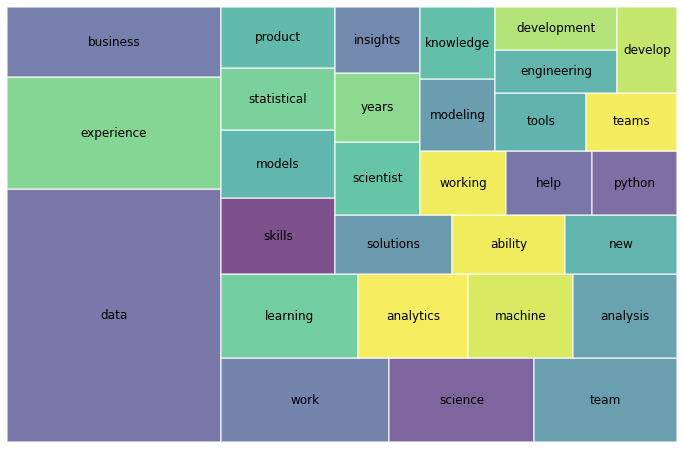

In [13]:
# Look at the top 30 words in a plot:
wc_top30 = wc[wc['rank'] <= 30]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=wc_top30['pct_total'], label=wc_top30['word'],
              alpha=.70, text_kwargs={'size': 12}, bar_kwargs={
        'linewidth': 1.5, 'edgecolor': 'white'})
plt.axis('off');

In [14]:
# Get just the stem words
ps = PorterStemmer()  # Instantiate the porter stemmer
STOP_WORDS = nlp.Defaults.stop_words  # Create a stop words list with just the default spaCy stop words
jobs['stems'] = jobs['tokens'].progress_apply(lambda x: [ps.stem(word) for word in x if word not in STOP_WORDS])
jobs.head()

100%|██████████| 356/356 [00:01<00:00, 178.54it/s]


,description,title,parsed,tokens,stems
0,"<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori,...",Data scientist,job requirements conceptual understanding in machine learning models like naive bayes kmeans svm apriori linear logistic regression neural random ...,"[job, requirements, conceptual, understanding, machine, learning, models, like, naive, bayes, kmeans, svm, apriori, linear, logistic, regression, ...","[job, requir, conceptu, understand, machin, learn, model, like, naiv, bay, kmean, svm, apriori, linear, logist, regress, neural, random, forest, d..."
1,"<div>Job Description<br/>\n<br/>\n<p>As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to ...",Data Scientist I,job description as a data scientist 1 you will help us build machine learning models data pipelines and microservices to help our clients naviga...,"[job, description, data, scientist, 1, help, build, machine, learning, models, data, pipelines, microservices, help, clients, navigate, healthcare...","[job, descript, data, scientist, 1, help, build, machin, learn, model, data, pipelin, microservic, help, client, navig, healthcar, journey, empow,..."
2,"<div><p>As a Data Scientist you will be working on consulting side of our business. You will be responsible for analyzing large, complex datasets ...",Data Scientist - Entry Level,as a data scientist you will be working on consulting side of our business you will be responsible for analyzing large complex datasets and identi...,"[data, scientist, working, consulting, business, responsible, analyzing, large, complex, datasets, identify, meaningful, patterns, lead, actionabl...","[data, scientist, work, consult, busi, respons, analyz, larg, complex, dataset, identifi, meaning, pattern, lead, action, recommend, perform, thor..."
3,"<div class=""jobsearch-JobMetadataHeader icl-u-xs-mb--md""><div class=""jobsearch-JobMetadataHeader-item ""><span class=""icl-u-xs-mr--xs"">$4,969 - $6,...",Data Scientist,4969 6756 a month contract under the general supervision of professors dana mukamel and kai zheng the incumbent will join the calmhsa mental heal...,"[4969, 6756, month, contract, general, supervision, professors, dana, mukamel, kai, zheng, incumbent, join, calmhsa, mental, health, tech, suite, ...","[4969, 6756, month, contract, gener, supervis, professor, dana, mukamel, kai, zheng, incumb, join, calmhsa, mental, health, tech, suit, innov, inn..."
4,<ul><li>Location: USA \xe2\x80\x93 multiple locations</li>\n<li>2+ years of Analytics experience</li>\n<li>Understand business requirements and te...,Data Scientist,location usa multiple locations 2 years of analytics experience understand business requirements and technical requirements can handle data ex...,"[location, usa, multiple, locations, 2, years, analytics, experience, understand, business, requirements, technical, requirements, handle, data, e...","[locat, usa, multipl, locat, 2, year, analyt, experi, understand, busi, requir, technic, requir, handl, data, extract, prepar, transform, creat, i..."


In [15]:
# Get word counts for my stemmed words
wc = count(jobs['stems'])
print(wc.shape)
wc.head(15)

(6432, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,data,353,3586,1.0,0.032710,0.032710,0.991573
46,experi,342,1757,2.0,0.016027,0.048737,0.960674
20,work,320,1360,3.0,0.012405,0.061143,0.898876
156,team,309,1145,4.0,0.010444,0.071587,0.867978
61,model,277,1057,5.0,0.009642,0.081229,0.778090
96,busi,267,1042,6.0,0.009505,0.090733,0.750000
165,analyt,255,1010,7.0,0.009213,0.099946,0.716292
193,develop,298,935,8.0,0.008529,0.108475,0.837079
6,learn,286,900,9.0,0.008210,0.116684,0.803371
50,scienc,285,838,10.0,0.007644,0.124328,0.800562


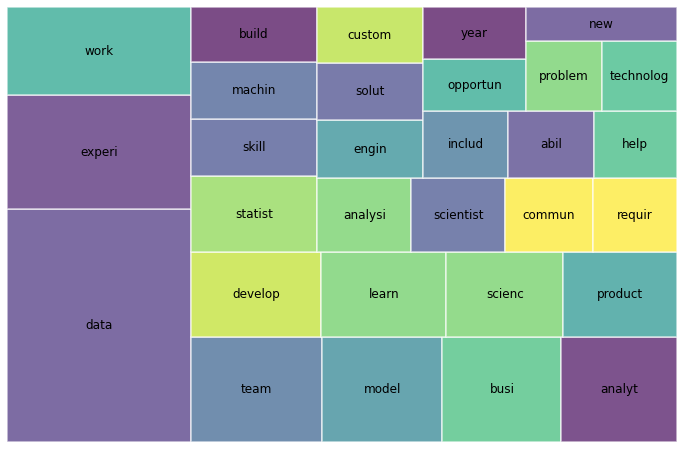

In [16]:
# Look at the top 30 words in a plot:
wc_top30 = wc[wc['rank'] <= 30]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=wc_top30['pct_total'], label=wc_top30['word'],
              alpha=.70, text_kwargs={'size': 12}, bar_kwargs={
        'linewidth': 1.5, 'edgecolor': 'white'})
plt.axis('off');

In [21]:
# Add stop words to SpaCy default stop words:
STOP_WORDS = nlp.Defaults.stop_words.union(['data', 'science', 'experience', 
                                            'business', 'work', 'team', 
                                            'skills', 'learning', 'job',
                                            'description', 'scientist'])

# Remove SpaCy default stop words plus my own from the tokens:
tokens = []

# Return lower case tokens and ignore default stop words/punctuation/digits/dates:
for doc in tokenizer.pipe(jobs['parsed'], batch_size=250):
    
    doc_tokens = []

    for token in doc:
        if (token.text not in STOP_WORDS) & (
                token.is_punct == False) & (
                token.is_space == False):
            
            doc_tokens.append(token.text)
    
    tokens.append(doc_tokens)
            

jobs['tokens'] = tokens
print(jobs.shape)
jobs['tokens'].head(10)

(356, 5)


0    [requirements, conceptual, understanding, machine, models, like, naive, bayes, kmeans, svm, apriori, linear, logistic, regression, neural, random,...
1    [1, help, build, machine, models, pipelines, microservices, help, clients, navigate, healthcare, journey, empowering, improving, generation, accol...
2    [working, consulting, responsible, analyzing, large, complex, datasets, identify, meaningful, patterns, lead, actionable, recommendations, perform...
3    [4969, 6756, month, contract, general, supervision, professors, dana, mukamel, kai, zheng, incumbent, join, calmhsa, mental, health, tech, suite, ...
4    [location, usa, multiple, locations, 2, years, analytics, understand, requirements, technical, requirements, handle, extraction, preparation, tran...
5    [create, intelligence, analytical, reports, visualization, dashboards, bi, tools, like, tableau, power, bi, similar, utilize, scientific, logic, p...
6    [spotify, premium, swells, 96m, subscribers, globe, looking, new,

In [22]:
wc = count(jobs['tokens'])
print(wc.shape)
wc.head(15)

(9425, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
314,analytics,205,619,1.0,0.006261,0.006261,0.575843
40,machine,232,586,2.0,0.005928,0.012189,0.651685
257,analysis,253,583,3.0,0.005897,0.018086,0.710674
5,models,212,522,4.0,0.005280,0.023367,0.595506
313,statistical,219,476,5.0,0.004815,0.028182,0.615169
272,product,171,464,6.0,0.004694,0.032875,0.480337
534,solutions,187,456,7.0,0.004613,0.037488,0.525281
25,ability,203,442,8.0,0.004471,0.041959,0.570225
105,new,206,436,9.0,0.004410,0.046369,0.578652
473,years,240,387,10.0,0.003915,0.050284,0.674157


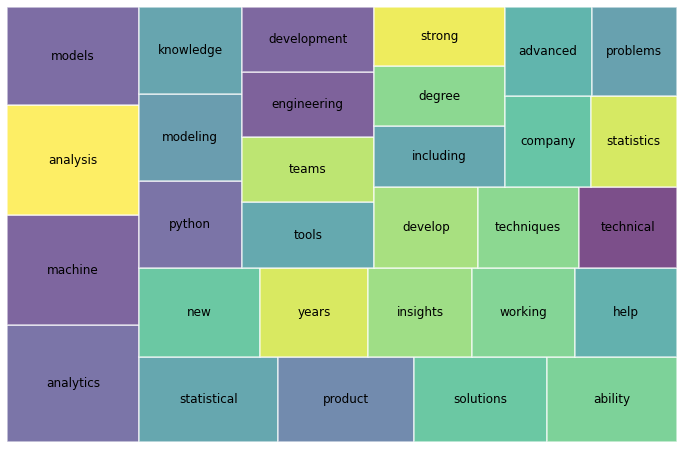

In [23]:
# Look at the top 30 words in a plot:
wc_top30 = wc[wc['rank'] <= 30]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=wc_top30['pct_total'], label=wc_top30['word'],
              alpha=.70, text_kwargs={'size': 12}, bar_kwargs={
        'linewidth': 1.5, 'edgecolor': 'white'})
plt.axis('off');

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [26]:
# Create the transformer
vect = CountVectorizer(stop_words='english',  # removes all default english stop words.
                       min_df=10,  # min documents word needs to be in to be included
                       max_df=0.5,  # can't appear in more than 50% of documents to remove words that are nonessential.
                       ngram_range=(1, 3)  # min and max of the ngrams (min = bigrams, max = trigrams)
                      )

# Build the vocab
vect.fit(jobs['parsed'])

# Get sparse Document Term Matrix (DTM)
dtm = vect.transform(jobs['parsed'])

# Turn into a dataframe
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [27]:
print(dtm.shape)
dtm.head()

(356, 2439)


,10,100,12,2019,25,30,35,35 years,3rd,40,...,years professional experience,years relevant,years work,years work experience,york,youll,youll need,youll work,youre,youve
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

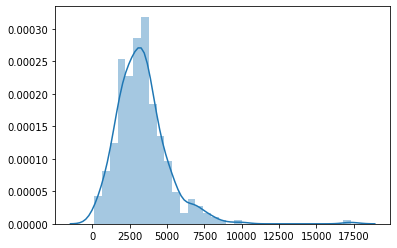

In [28]:
# Get the length of all documents in character count
doc_len = [len(doc) for doc in jobs['parsed']]

sns.distplot(doc_len);

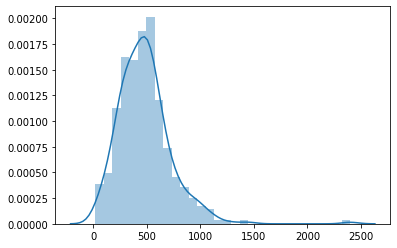

In [29]:
# Get the length of all documents in word count
char_len = [len(doc.split()) for doc in jobs['parsed']]

sns.distplot(char_len);

In [30]:
wc = count(jobs['tokens'])
print(wc.shape)
wc.head(15)

(9425, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
314,analytics,205,619,1.0,0.006261,0.006261,0.575843
40,machine,232,586,2.0,0.005928,0.012189,0.651685
257,analysis,253,583,3.0,0.005897,0.018086,0.710674
5,models,212,522,4.0,0.005280,0.023367,0.595506
313,statistical,219,476,5.0,0.004815,0.028182,0.615169
272,product,171,464,6.0,0.004694,0.032875,0.480337
534,solutions,187,456,7.0,0.004613,0.037488,0.525281
25,ability,203,442,8.0,0.004471,0.041959,0.570225
105,new,206,436,9.0,0.004410,0.046369,0.578652
473,years,240,387,10.0,0.003915,0.050284,0.674157


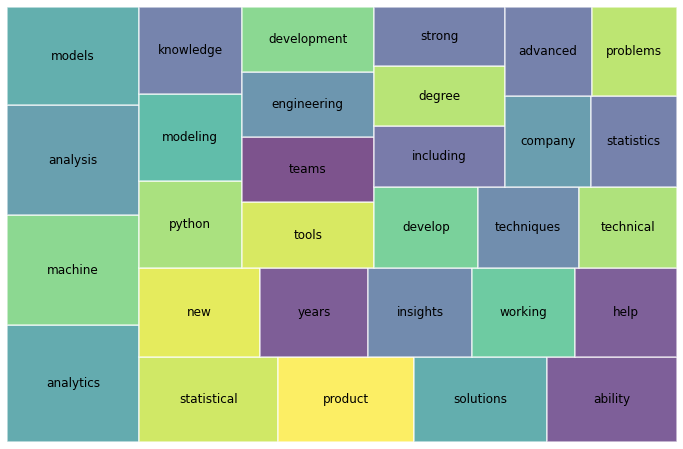

In [31]:
# Look at the top 30 words in a plot:
wc_top30 = wc[wc['rank'] <= 30]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=wc_top30['pct_total'], label=wc_top30['word'],
              alpha=.70, text_kwargs={'size': 12}, bar_kwargs={
        'linewidth': 1.5, 'edgecolor': 'white'})
plt.axis('off');

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [32]:
# Instantiate the vectorizer object
tfidf = TfidfVectorizer(stop_words=STOP_WORDS,
                        min_df=10,
                        max_df=0.50,
                        ngram_range=(1, 3)
                       )

# Create a vocab and get word counts per document
dtm = tfidf.fit_transform(jobs['parsed'])

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# look at the Feature Matrix as a DataFrame
print(dtm.shape)
dtm.head()

(356, 2141)


,10,100,12,2019,25,30,35,35 years,3rd,40,...,years industry,years professional,years related,years relevant,years working,york,youll,youll need,youre,youve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_space != True)]

In [34]:
# Tunning the Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        lowercase=True,
                        strip_accents='unicode',
                        ngram_range=(1,3),
                        max_df=.5,
                        min_df=5,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(jobs['parsed'])

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(356, 5152)


,1,1 year,1 year experience,10,10 year,100,100000,11,12,12 month,...,year related,year related experience,year relevant,year relevant experience,year relevant work,year work,year work experience,yes,york,york city
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.096153,0.055943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Get the Distance Matrix for my tfidf dtm
dist_matrix  = cosine_similarity(dtm)

In [36]:
# Turn my distance matrix into a DataFrame
job_sim = pd.DataFrame(dist_matrix)

In [37]:
# Check my work
print(job_sim.shape)
job_sim.head()

(356, 356)


,0,1,2,3,4,5,6,7,8,9,...,346,347,348,349,350,351,352,353,354,355
0,1.000000,0.043529,0.004100,0.000000,0.034953,0.075537,0.016161,0.028878,0.044132,0.035948,...,0.010631,0.026246,0.048309,0.064646,0.025243,0.056271,0.012853,0.012313,0.033997,0.032580
1,0.043529,1.000000,0.067747,0.030522,0.015055,0.075929,0.078645,0.086384,0.109951,0.093974,...,0.056522,0.033462,0.103013,0.127981,0.051911,0.081273,0.085044,0.053010,0.073966,0.065576
2,0.004100,0.067747,1.000000,0.010194,0.028091,0.045567,0.034525,0.063370,0.032733,0.015718,...,0.045525,0.031856,0.038327,0.013400,0.023483,0.058879,0.032365,0.018274,0.062019,0.043032
3,0.000000,0.030522,0.010194,1.000000,0.008421,0.045047,0.007941,0.132514,0.034279,0.090150,...,0.043703,0.019225,0.033611,0.032402,0.029559,0.056849,0.062672,0.020088,0.089862,0.148225
4,0.034953,0.015055,0.028091,0.008421,1.000000,0.020283,0.008456,0.014514,0.016401,0.003912,...,0.013777,0.014731,0.013917,0.089189,0.016304,0.052933,0.010628,0.007119,0.014119,0.014640


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [38]:
# Fit NearestNeighbor model on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [39]:
# Get the 5 nearest neighbors for doc 0
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.3061809 , 1.31707988, 1.32165894, 1.32169515]]),
 array([[  0, 104, 235,  39, 287]], dtype=int64))

In [40]:
# Get the 5 nearest neighbors for doc 218
nn.kneighbors([dtm.iloc[218]])

(array([[0.        , 1.19414818, 1.28371541, 1.28731699, 1.29858969]]),
 array([[218, 263,  86, 266, 306]], dtype=int64))

In [41]:
# Look at the first 250 char text for the doc I am comparing
jobs['parsed'][218][:250]

'please review the job details below are you excited by the possibilities presented by combining machine learning and the cloud do you have the drive to contribute to our nations security in an increasingly datarich environment threats to our country '

In [42]:
# Look at the first 250 char text for the 3rd nearest neighbor
jobs['parsed'][86][:250]

'major responsibilities researches and identifies machine learning ml and natural language processing nlp methods and algorithms to solve specific problems to improve user experience on ip  science data and websites implements these methods and devise'

In [43]:
# Description of the job I would like to have in Data Science
my_job = ['''
Machine learning engineer who uses visualizations to better view the data. 
Work remotely from home full time, no travel required.
Work anywhere in the country. Endorsement received from Lambda school. 
Computer Science certificate from Harvard University.
Entry level position with 1 year or less experience. 
Create visualization based on data to explain data to non-tech persons. 
Create and maintain a database and website with the data.
''']

In [44]:
# Use tf-idf to transform the text of the job I want to run through the knn model
mine = tfidf.transform(my_job)

In [45]:
# Look at the 'mine' object after transform
mine

# Id and remove identical entries
# try using set() with the vectorized text

<1x5152 sparse matrix of type '<class 'numpy.float64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [46]:
# Run my job through the knn model to get the 5 closest related jobs
nn.kneighbors(mine.todense())

(array([[1.31164873, 1.31386687, 1.31865145, 1.33235871, 1.34153918]]),
 array([[108, 287, 159,  33,  18]], dtype=int64))

In [47]:
# Look at the most likely result from the knn
print('Job Title:', jobs['title'][108], '\n')
print('Job Description:\n', jobs['parsed'][108])

Job Title: Data Scientist 

Job Description:
 the data scientist role will be instrumental in helping wwe continue its evolution into a data driven analytics driven organization the data scientist will execute analytical tasks such as model development scoring and deliverable production to support wwe decision makers projectstasks will range from deep dives on specific topics creation of analytical models to building reports and dashboards with kpis and trends she will support business stakeholders through handson quantitative analytics of transactional and behavioral data key responsibilities   develop predictive and descriptive models using advanced statistical optimization and big data techniques including multivariate regression decision treesclassification and time series assist in identifying critical questions to be answered and contribute to developing analyticsdriven solutions and kpis to enable more effective decision making conduct analysis and data modeling to draw insights

In [48]:
# Look at the 2nd most likely result from the knn
print('Job Title:', jobs['title'][287], '\n')
print('Job Description:\n', jobs['parsed'][251])

Job Title: Data Scientist I-III 

Job Description:
 discover a more rewarding way to work  at discover financial services youll find yourself in the company of some of the industrys smartest and most reliable professionals and at a company that rewards dedication values innovation and supports growth  thrive in an environment that promotes teamwork and shared success build on a foundation of mutual respect join the company that understands rewarding careers like no other with this exceptional opportunity  job description at discover be part of a culture where diversity teamwork and collaboration reign join a company that is just as employeefocused as it is on its customers and is consistently awarded for both were all about people and our employees are why discover is a great place to work be the reason we help millions of consumers build a brighter financial future and achieve yours along the way with a rewarding career  responsible for applying machine learning and data science to de

In [49]:
# Look at the 3rd most likely result from the knn
print('Job Title:', jobs['title'][159], '\n')
print('Job Description:\n', jobs['parsed'][316])

Job Title: Data Scientist-Global People Analytics 

Job Description:
 the vision of the pricing and merchandising analytics team at best buy is to provide clear relevant actionable measurable and trusted intelligence to the enterprise which will be acted upon to drive growth of the global enterprise we are seeking a data scientist pricing who will provide statistical and mathematical support to partners throughout the best buy organization  this role will provide advanced statistical and mathematical support to partners throughout the best buy organization the ideal candidate will have a strong basis in statistical modeling techniques such as linear and logistic regression clustering time series modeling and machine learning techniques the candidate should be comfortable with variable reduction validation techniques serializing models and automation  the individual in this position will work with both end business clients and peers within the pricing and analytics teams the individual 

In [50]:
# Look at the 4th most likely result from the knn
print('Job Title:', jobs['title'][33], '\n')
print('Job Description:\n', jobs['parsed'][159])

Job Title: Data Scientist 

Job Description:
 position description  demonstrates uptodate expertise and applies this to the development execution and improvement of action plans develops analytical models to drive analytics insights leads small and participates in large data analytics project teams models compliance with company policies and procedures and supports company mission values and standards of ethics and integrity participates in the continuous improvement of data science and analytics presents data insights and recommendations to key stakeholders provides and supports the implementation of business solutions  minimum qualifications  bachelor of science and 2 years data science experience or master of science and 1 years data science experience  additional preferred qualifications  4 years experience with sql and relational databases for example db2 oracle sql server 4 years experience with statistical programming languages for example sas r bachelors degree in statistics ec

In [51]:
# Look at the 5th most likely result from the knn
print('Job Title:', jobs['title'][18], '\n')
print('Job Description:\n', jobs['parsed'][112])

Job Title: Assistant Data Scientist 

Job Description:
 job description  data scientist positions offered by ford motor company dearborn mi build machine learning models to solve business problems perform data acquisition and cleaning data exploration hypothesis formation and testing experimental design and custom software development   minimum requirements  requires a masters or foreign equivalent degree in industrial engineering computer science or a related field 3 years of experience in the position offered or 3 years of experience in automotive industry supporting business units with machine learning and deep learning techniques 3 years of experience developing machine learning models with a focus on text analytics applications with natural language processing techniques including parsing word embeddings clustering cosine distance similarity metrics language modeling and ontologies 3 years of experience performing hypothesis testing and inference probability distributions confiden

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 